### Table of contents

Create a dataframe with missing values
Identification:
    1. Identification of missing values - Exploration by numbers
    2. Identification of missing values - Visualization by graphs
Solutions:
    1. Drop missing observations
        1.Drop rows where any cells in that row is NA
        2.Drop rows where all cells in that row is NA
        3.Drop column if they only contain missing values
        4.Drop rows that contain less than five observations(threshold)
    2. Fill in missing data
        1.with zeros
        2.with mean value
        3.with median value
        4.with bfill or ffill
    3. Impute missing values using sklearn
        

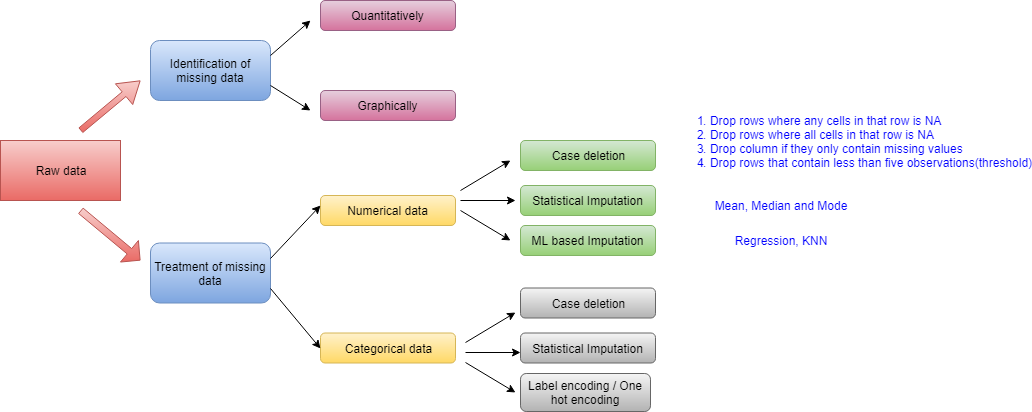

In [33]:
from IPython.display import Image
Image("Missing values/Missing values.png")

### Operating on Null Values

Pandas treats None and NaN as essentially interchangeable for indicating missing or null values. To facilitate this convention, there are several useful methods for detecting, removing, and replacing null values in Pandas data structures. They are:

isnull(): Generate a boolean mask indicating missing values
notnull(): Opposite of isnull()
dropna(): Return a filtered version of the data
fillna(): Return a copy of the data with missing values filled or imputed

In [ ]:
# !pip install missingno
# !pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
import pandas_profiling
import matplotlib.pyplot as plt

### Create dataframe with missing values

In [3]:
raw_data = {'first_name': ['Jason', np.nan, 'Tina', 'Jake', 'Amy'], 
        'last_name': ['Miller', np.nan, 'Ali', 'Milner', 'Cooze'], 
        'age': [42, np.nan, 36, 24, 73], 
        'sex': ['m', np.nan, 'f', 'm', 'f'], 
        'preTestScore': [4, np.nan, np.nan, 2, 3],
        'postTestScore': [25, np.nan, np.nan, 62, 70]}
df = pd.DataFrame(raw_data, columns = ['first_name', 'last_name', 'age', 'sex', 'preTestScore', 'postTestScore'])
df

,first_name,last_name,age,sex,preTestScore,postTestScore
0,Jason,Miller,42.0,m,4.0,25.0
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Tina,Ali,36.0,f,NaN,NaN
3,Jake,Milner,24.0,m,2.0,62.0
4,Amy,Cooze,73.0,f,3.0,70.0


In [ ]:
# df.info()
df.describe()

In [10]:
print("The number of observations -", df.shape[0])
print("The number of columns -", df.shape[1])

The number of observations - 5
The number of columns - 6


### Identification of missing values - numbers

In [28]:
total_non_missing = df.notnull().sum().sort_values(ascending=False)
total_missing = df.isnull().sum().sort_values(ascending=False)
# percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
percent_of_missing = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
missing_data = pd.concat([total_non_missing,total_missing, percent_of_missing], axis=1, 
                         keys=['Total_non_missing','Total_missing', 'Percent_of_missing'])
missing_data.head(10)

,Total_non_missing,Total_missing,Percent_of_missing
age,4,1,20.0
first_name,4,1,20.0
last_name,4,1,20.0
postTestScore,3,2,40.0
preTestScore,3,2,40.0
sex,4,1,20.0


### Identification of missing values - visualization

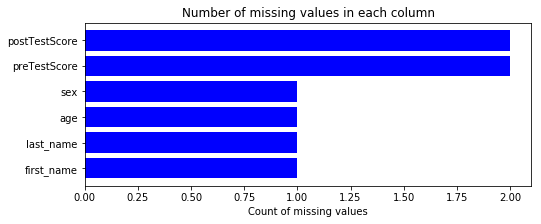

In [36]:
missing_df = df.isnull().sum(axis=0).reset_index()
# missing_df = df.isnull().sum()
missing_df.columns = ['column_name', 'missing_count'];missing_df
missing_df = missing_df.loc[missing_df['missing_count']>0];missing_df
missing_df = missing_df.sort_values(by='missing_count');missing_df

ind = np.arange(missing_df.shape[0])
width = 0.9
fig, ax = plt.subplots(figsize=(8,3))
rects = ax.barh(ind, missing_df.missing_count.values, color='blue')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

#### Matrix
The msno.matrix nullity matrix is a data-dense display which lets you quickly visually pick out patterns in data completion

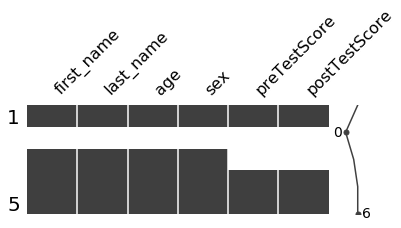

In [19]:
import missingno as msno
%matplotlib inline
msno.matrix(df,figsize=(6,2))

# msno.matrix(df.sample(10000))

#### Bar
msno.bar is a simple visualization of nullity by column
You can switch to a logarithmic scale by specifying log=True. bar provides the same information as matrix, but in a simpler format.

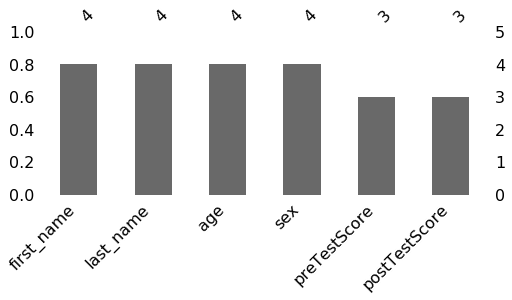

In [20]:
msno.bar(df,figsize=(8,3))

### Heatmap
The missingno correlation heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does)

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

Entries marked <1 or >-1 are have a correlation that is close to being exactingly negative or positive, but is still not quite perfectly so. This points to a small number of records in the dataset which are erroneous.

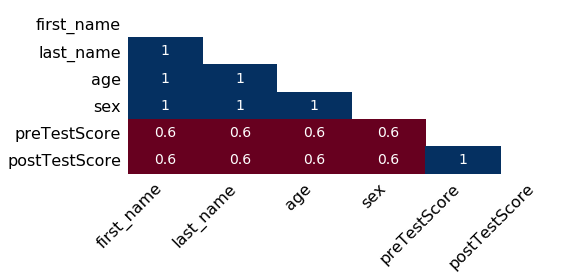

In [34]:
msno.heatmap(df,figsize=(8,3))